In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100


In [3]:
# Load the dataset
df = pd.read_csv('Dataset/mapped_crimes_dataset.csv')
df.head()

,ID,Primary_Type,Community_Area,Month,Hour,Year,Severity_Score
0,13311263,OFFENSE INVOLVING CHILDREN,30,7,3,2022,14.0714
1,13053066,NARCOTICS,26,1,16,2023,10.0833
2,12131221,ROBBERY,24,8,9,2020,11.8909
3,11227634,CRIMINAL SEXUAL ASSAULT,32,8,10,2017,27.0000
4,13203321,CRIMINAL DAMAGE,32,9,17,2023,5.0350


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   Primary_Type    object 
 2   Community_Area  int64  
 3   Month           int64  
 4   Hour            int64  
 5   Year            int64  
 6   Severity_Score  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 142.7+ MB


In [5]:
# Check for missing values
print("--- Missing Values Count ---")
print(df.isnull().sum())

# Convert relevant columns to appropriate types (if they aren't already)
# Community_Area, Month, Hour are often better treated as categorical/object for plotting
df['Community_Area'] = df['Community_Area'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Hour'] = df['Hour'].astype('category')
df['Year'] = df['Year'].astype('category')
df['Primary_Type'] = df['Primary_Type'].astype('category')

# Re-check the info after type conversion
print("\n--- DataFrame Info After Type Conversion ---")
df.info()

--- Missing Values Count ---
ID                  0
Primary_Type        0
Community_Area      0
Month               0
Hour                0
Year                0
Severity_Score    192
dtype: int64

--- DataFrame Info After Type Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   ID              int64   
 1   Primary_Type    category
 2   Community_Area  category
 3   Month           category
 4   Hour            category
 5   Year            category
 6   Severity_Score  float64 
dtypes: category(5), float64(1), int64(1)
memory usage: 53.5 MB


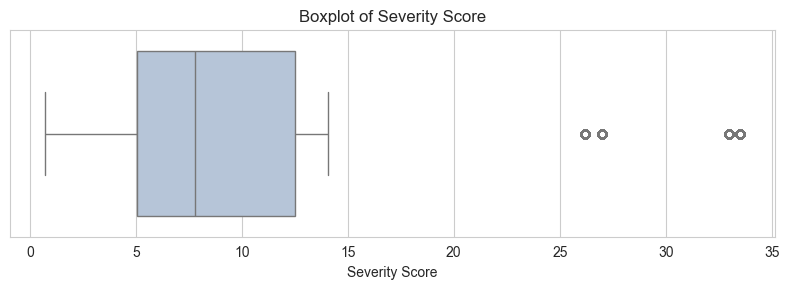

Summary statistics for Severity_Score:
count    2.671472e+06
mean     8.830146e+00
std      4.432740e+00
min      7.000000e-01
25%      5.035000e+00
50%      7.784200e+00
75%      1.250500e+01
max      3.351670e+01
Name: Severity_Score, dtype: float64

IQR: 7.4700
Lower fence (for outliers): -6.1700
Upper fence (for outliers): 23.7100
Min: 0.7000
Max: 33.5167


In [6]:
# Boxplot of Severity_Score with basic summary stats
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Severity_Score'], color='lightsteelblue')
plt.title('Boxplot of Severity Score')
plt.xlabel('Severity Score')
plt.tight_layout()
plt.show()

# Summary statistics and outlier fences
print("Summary statistics for Severity_Score:")
print(df['Severity_Score'].describe())

q1 = df['Severity_Score'].quantile(0.25)
q3 = df['Severity_Score'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

print(f"\nIQR: {iqr:.4f}")
print(f"Lower fence (for outliers): {lower_fence:.4f}")
print(f"Upper fence (for outliers): {upper_fence:.4f}")
print(f"Min: {df['Severity_Score'].min():.4f}")
print(f"Max: {df['Severity_Score'].max():.4f}")

Univariate Analysis

In [7]:
# Total number of unique community areas
total_areas = df['Community_Area'].nunique()
print("Total community areas in dataset:", total_areas)

# Also print which areas exist (optional)
print(sorted(df['Community_Area'].unique()))

Total community areas in dataset: 77
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1455445393.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Community_Area')


   Community_Area  Total_Crimes
24             25        150097
7               8        113534
27             28         96305
31             32         91210
42             43         89759
..            ...           ...
17             18          6596
73             74          5838
11             12          5481
46             47          3771
8               9          2900

[77 rows x 2 columns]


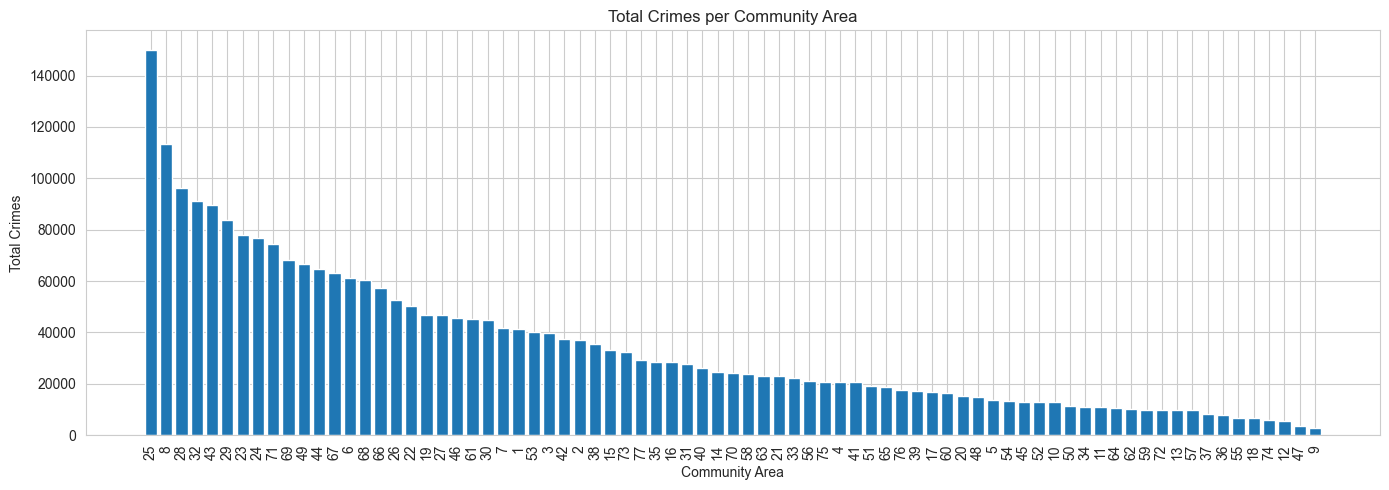

In [11]:
# Total number of crimes per community area
crime_counts = (
    df.groupby('Community_Area')
      .size()
      .reset_index(name='Total_Crimes')
      .sort_values('Total_Crimes', ascending=False)
)

print(crime_counts)

# Optional: plot bar graph
plt.figure(figsize=(14,5))
plt.bar(crime_counts['Community_Area'].astype(str), crime_counts['Total_Crimes'])
plt.xlabel("Community Area")
plt.ylabel("Total Crimes")
plt.title("Total Crimes per Community Area")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


--- Top 10 Primary Crime Types ---
Primary_Type
THEFT                  604870
BATTERY                491004
CRIMINAL DAMAGE        297208
ASSAULT                216894
DECEPTIVE PRACTICE     179449
OTHER OFFENSE          171901
MOTOR VEHICLE THEFT    156444
NARCOTICS              112259
BURGLARY               107020
ROBBERY                100357
Name: count, dtype: int64


C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1035498325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")


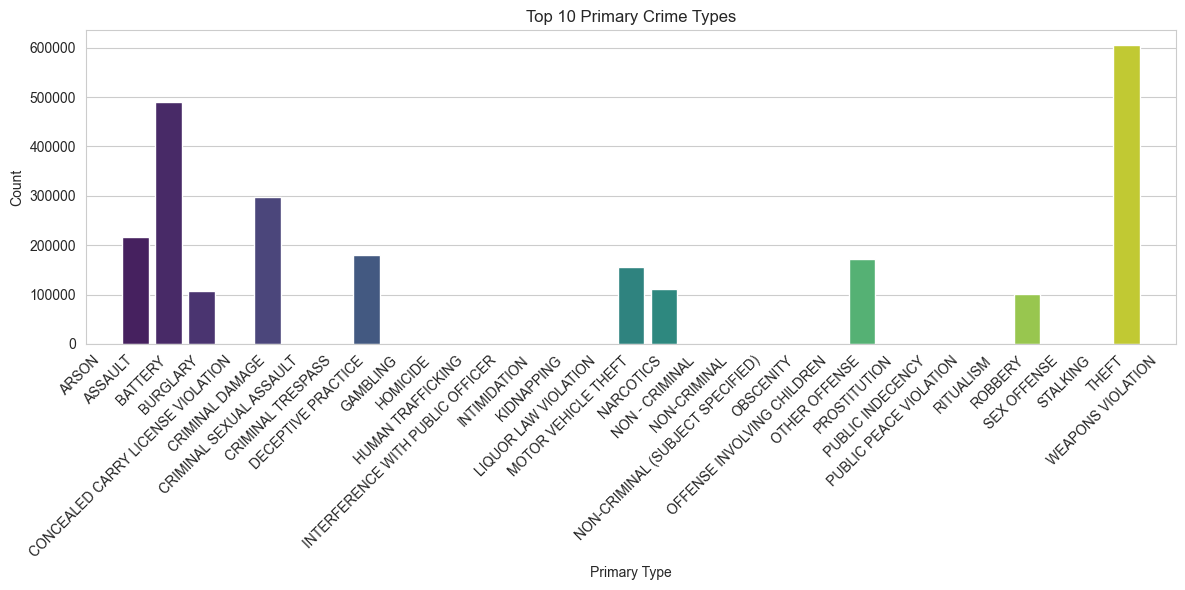

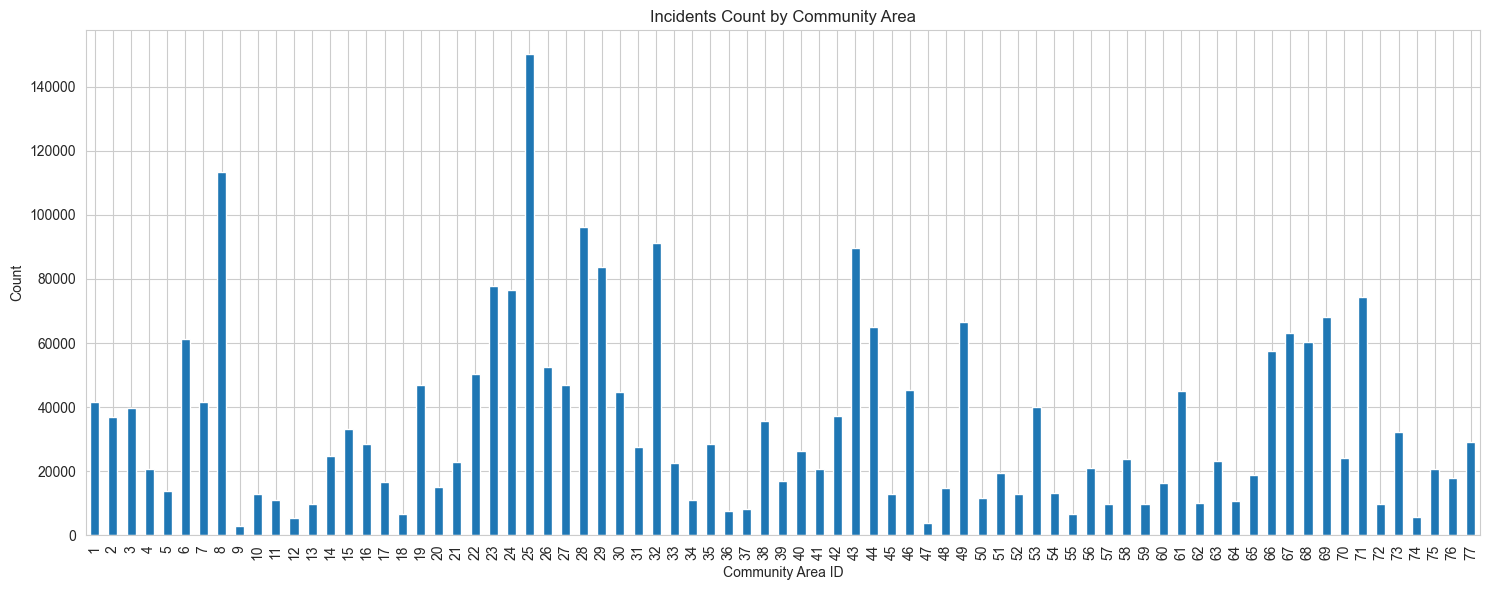

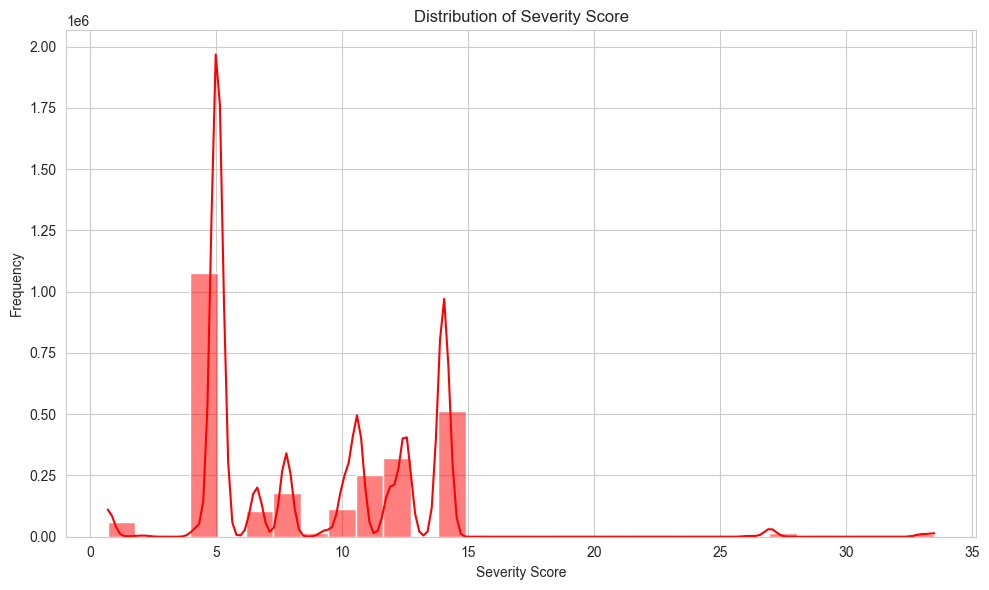

In [8]:
# 1. Primary_Type (Top Crime Types)
print("--- Top 10 Primary Crime Types ---")
top_crimes = df['Primary_Type'].value_counts().nlargest(10)
print(top_crimes)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Community_Area (Distribution)
plt.figure(figsize=(15, 6))
df['Community_Area'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents Count by Community Area')
plt.xlabel('Community Area ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 3. Severity_Score (Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df['Severity_Score'], bins=30, kde=True, color='red')
plt.title('Distribution of Severity Score')
plt.xlabel('Severity Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

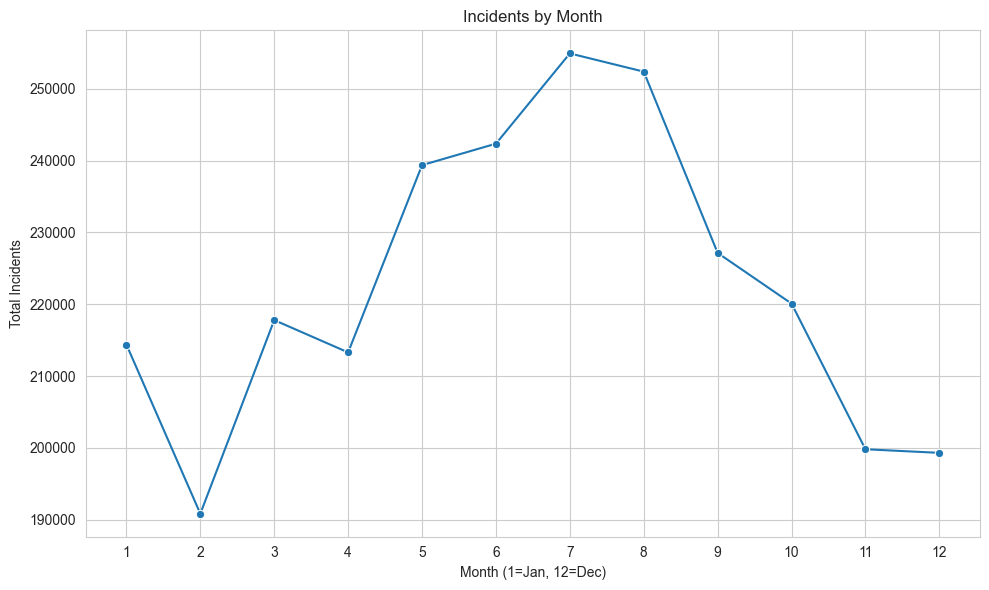

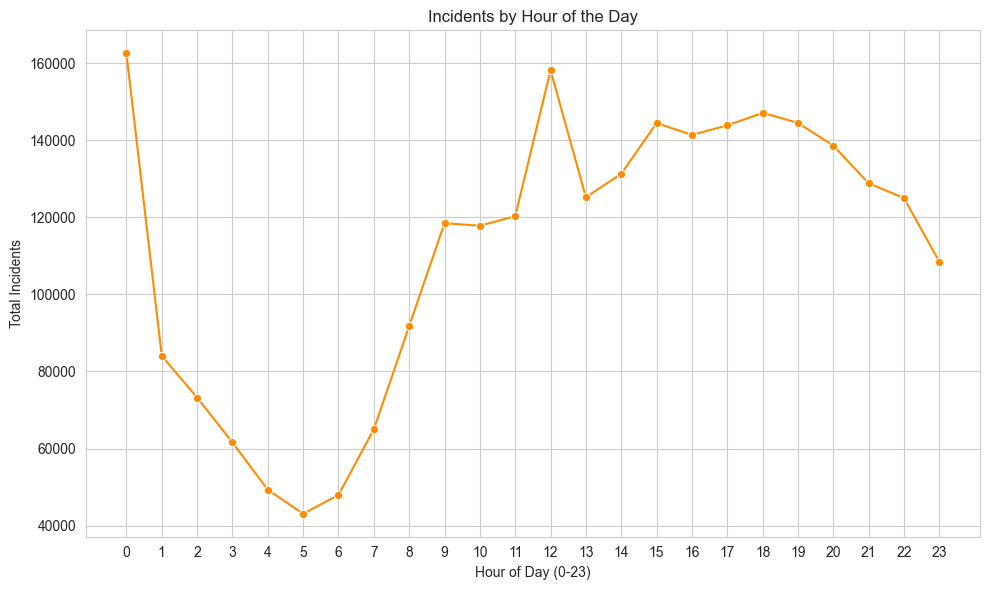

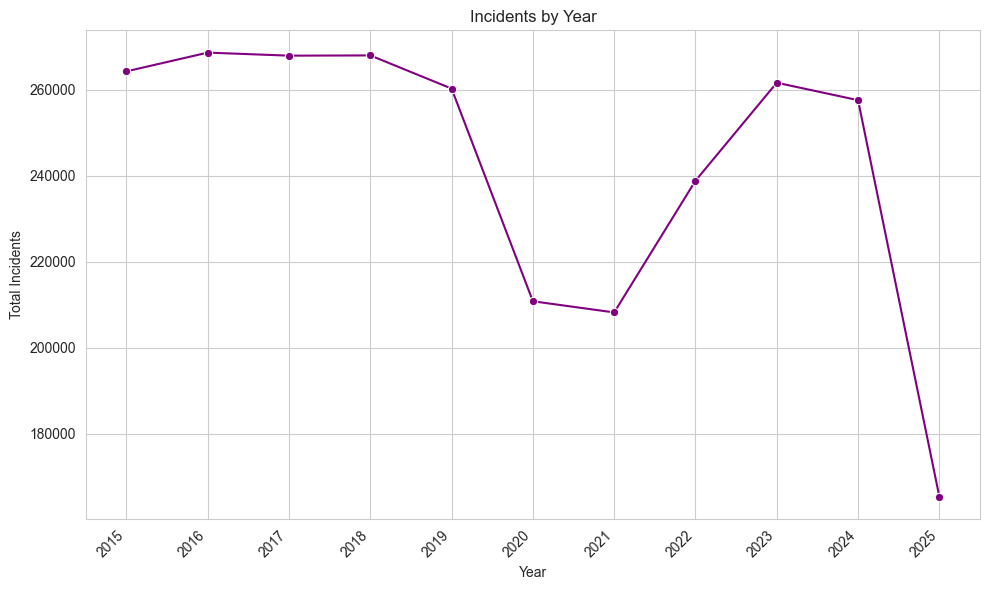

In [9]:
# 1. Monthly Trend
plt.figure(figsize=(10, 6))
# Ensure Month is sorted correctly for plotting (convert back to int for ordering if necessary)
monthly_counts = df['Month'].value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Incidents by Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Total Incidents')
plt.xticks(np.arange(1, 13, 1))
plt.tight_layout()
plt.show()


# 2. Hourly Trend (Diurnal Pattern)
plt.figure(figsize=(10, 6))
hourly_counts = df['Hour'].value_counts().sort_index()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='darkorange')
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Incidents')
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()


# 3. Yearly Trend
if len(df['Year'].unique()) > 1:
    plt.figure(figsize=(10, 6))
    yearly_counts = df['Year'].value_counts().sort_index()
    sns.lineplot(x=yearly_counts.index.astype(str), y=yearly_counts.values, marker='o', color='purple')
    plt.title('Incidents by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n--- Yearly Trend Skipped ---")
    print("Only one unique year found in the dataset.")

Bivariate Analysis

C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1576268288.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_severity_by_type = df.groupby('Primary_Type')['Severity_Score'].mean().nlargest(10)
C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1576268288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_severity_by_type.index, y=avg_severity_by_type.values, palette="rocket")


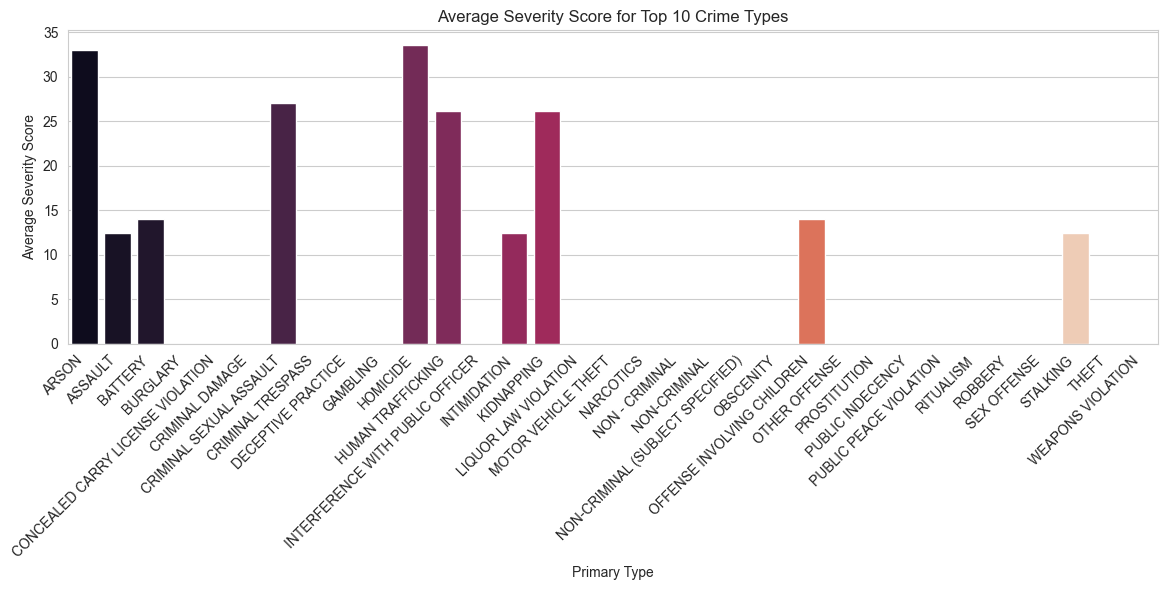

C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1576268288.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  community_risk = df.groupby('Community_Area')['Severity_Score'].sum().sort_values(ascending=False).head(20) # Top 20
C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1576268288.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=community_risk.index.astype(str), y=community_risk.values, palette="magma")


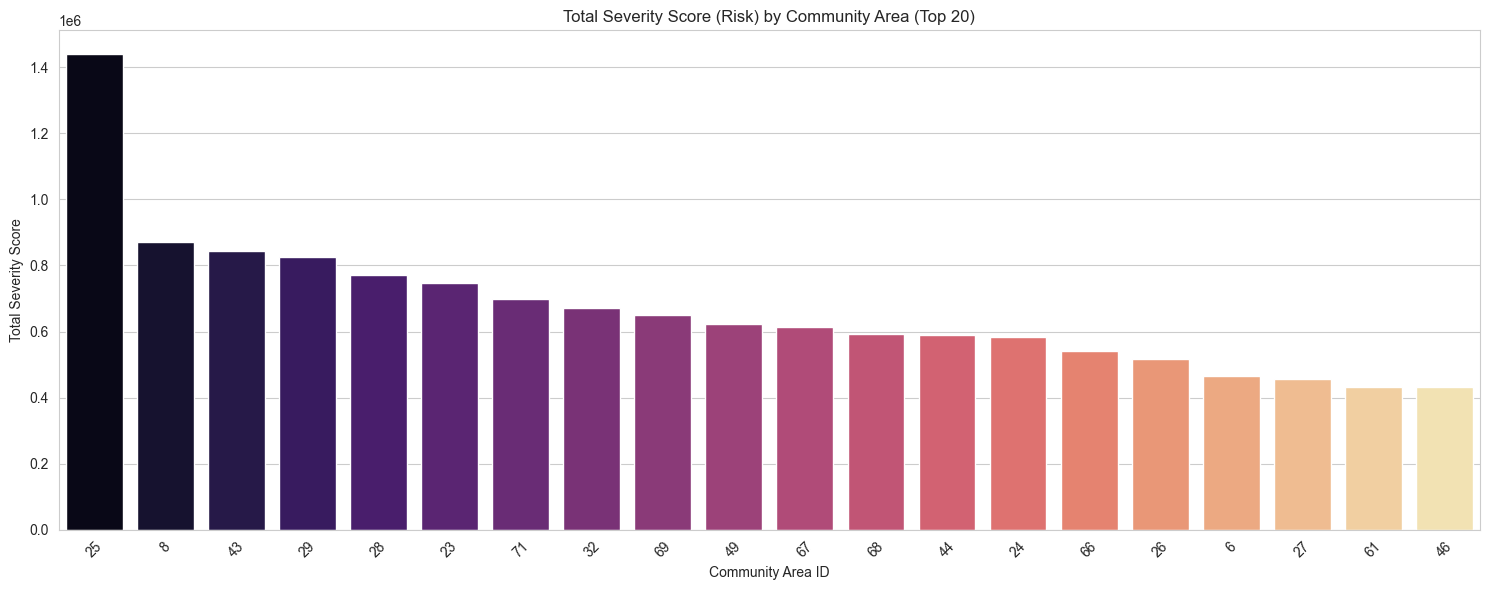

C:\Users\NIKUNJ\AppData\Local\Temp\ipykernel_31724\1576268288.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Month', 'Hour']).size().unstack(fill_value=0)


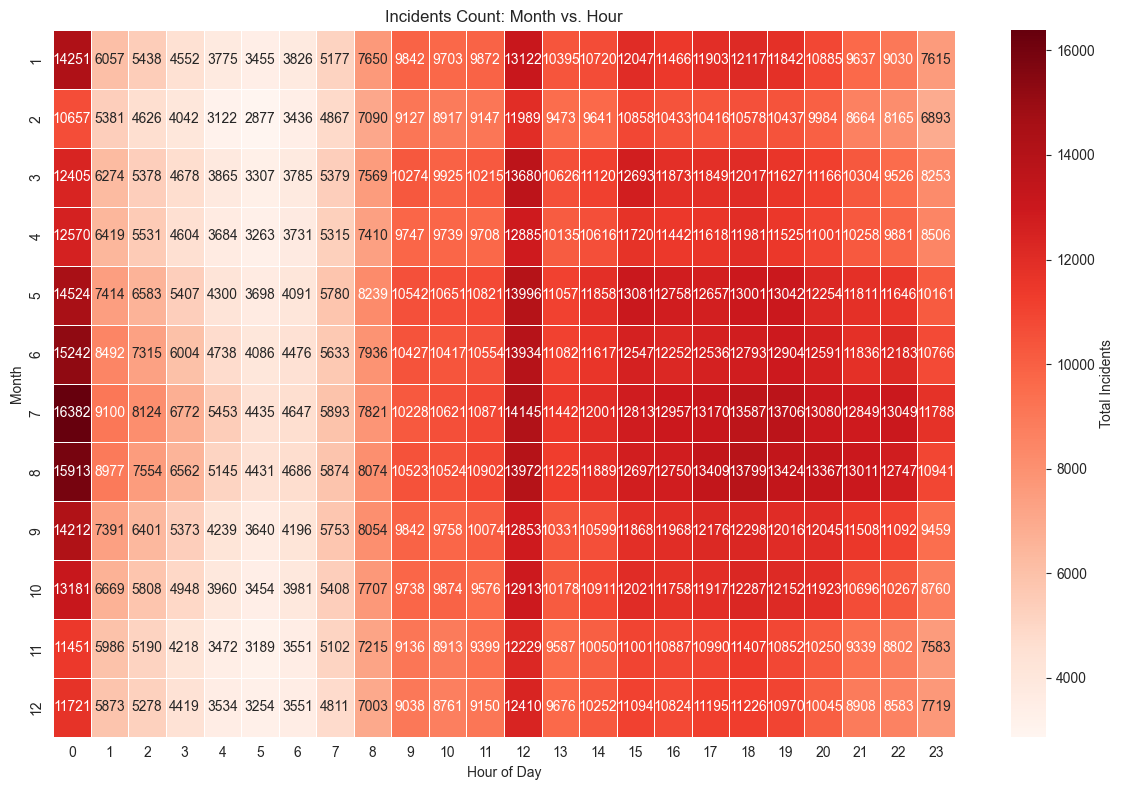

In [10]:
# 1. Average Severity Score by Primary Type
plt.figure(figsize=(12, 6))
avg_severity_by_type = df.groupby('Primary_Type')['Severity_Score'].mean().nlargest(10)
sns.barplot(x=avg_severity_by_type.index, y=avg_severity_by_type.values, palette="rocket")
plt.title('Average Severity Score for Top 10 Crime Types')
plt.xlabel('Primary Type')
plt.ylabel('Average Severity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Total Severity Score by Community Area (Indicator of overall risk)
plt.figure(figsize=(15, 6))
community_risk = df.groupby('Community_Area')['Severity_Score'].sum().sort_values(ascending=False).head(20) # Top 20
sns.barplot(x=community_risk.index.astype(str), y=community_risk.values, palette="magma")
plt.title('Total Severity Score (Risk) by Community Area (Top 20)')
plt.xlabel('Community Area ID')
plt.ylabel('Total Severity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Time-based Heatmap of Incidents (Hour vs. Month)
# Aggregate the counts
heatmap_data = df.groupby(['Month', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Total Incidents'})
plt.title('Incidents Count: Month vs. Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.tight_layout()
plt.show()